In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

csvpath1 = "Data_Sets/whp_depression_merge.csv"
csvpath2 = "Data_Sets/Country_Coordinates.csv"

whp_dep_df = pd.read_csv(csvpath1)
country_coord_df = pd.read_csv(csvpath2)


In [2]:
#remove unnecessary columns

whp_dep_df = pd.DataFrame(whp_dep_df[["Country",
                                      "Happiness Rank 2015",
                                      "Happiness Rank 2016",
                                      "Happiness Rank 2017",
                                      "Happiness Score 2015",
                                      "Happiness Score 2016",
                                      "Happiness Score 2017",
                                      "2015_pop_w_depression",
                                      "2016_pop_w_depression"]])
whp_dep_df.head()

,Country,Happiness Rank 2015,Happiness Rank 2016,Happiness Rank 2017,Happiness Score 2015,Happiness Score 2016,Happiness Score 2017,2015_pop_w_depression,2016_pop_w_depression
0,Switzerland,1,2,4,7.587,7.509,7.494,3.882479,3.873037
1,Iceland,2,3,3,7.561,7.501,7.504,3.583622,3.582981
2,Denmark,3,1,2,7.527,7.526,7.522,3.432378,3.432563
3,Norway,4,4,1,7.522,7.498,7.537,4.043903,4.080700
4,Canada,5,6,7,7.427,7.404,7.316,3.978904,3.998307


In [3]:
whp_dep_df = whp_dep_df.rename(columns ={"2015_pop_w_depression" : "Percent Pop w Depression 2015",
                                         "2016_pop_w_depression" : "Percent Pop w Depression 2016"})

In [4]:
country_coord_df = country_coord_df.rename(columns = {"country" : "Country Code",
                                                      "name" : "Country",
                                                      "latitude":"Latitude",
                                                      "longitude":"Longitude"})

country_coord_df = pd.DataFrame(country_coord_df[["Country",
                                                 "Country Code",
                                                 "Latitude",
                                                 "Longitude"]])
country_coord_df.head()

,Country,Country Code,Latitude,Longitude
0,Andorra,AD,42.546245,1.601554
1,United Arab Emirates,AE,23.424076,53.847818
2,Afghanistan,AF,33.939110,67.709953
3,Antigua and Barbuda,AG,17.060816,-61.796428
4,Anguilla,AI,18.220554,-63.068615


In [5]:
merged_w_coord_df = pd.merge(country_coord_df, whp_dep_df, on = "Country")
merged_w_coord_df.head()

,Country,Country Code,Latitude,Longitude,Happiness Rank 2015,Happiness Rank 2016,Happiness Rank 2017,Happiness Score 2015,Happiness Score 2016,Happiness Score 2017,Percent Pop w Depression 2015,Percent Pop w Depression 2016
0,United Arab Emirates,AE,23.424076,53.847818,20,28,21,6.901,6.573,6.648,3.124907,3.128079
1,Afghanistan,AF,33.939110,67.709953,153,154,141,3.575,3.360,3.794,4.399010,4.404727
2,Albania,AL,41.153332,20.168331,95,109,109,4.959,4.655,4.644,2.450237,2.450883
3,Armenia,AM,40.069099,45.038189,127,121,121,4.350,4.360,4.376,3.057042,3.068547
4,Angola,AO,-11.202692,17.873887,137,141,140,4.033,3.866,3.795,4.716832,4.715467


In [6]:
merged_w_coord_df.count()

Country                          138
Country Code                     138
Latitude                         138
Longitude                        138
Happiness Rank 2015              138
Happiness Rank 2016              138
Happiness Rank 2017              138
Happiness Score 2015             138
Happiness Score 2016             138
Happiness Score 2017             138
Percent Pop w Depression 2015    138
Percent Pop w Depression 2016    138
dtype: int64

In [7]:
#calculate average score for 3 years for happiness score, 2 years depression rate, add to df

merged_w_coord_df['Average Happiness Score 2015-2017'] = merged_w_coord_df[['Happiness Score 2015',
                                                                  'Happiness Score 2016',
                                                                  'Happiness Score 2017']].mean(axis=1)
merged_w_coord_df['Average % Pop w Depression 2015-2016'] = merged_w_coord_df[['Percent Pop w Depression 2015',
                                                                  'Percent Pop w Depression 2016']].mean(axis=1)
merged_w_coord_df.head()


,Country,Country Code,Latitude,Longitude,Happiness Rank 2015,Happiness Rank 2016,Happiness Rank 2017,Happiness Score 2015,Happiness Score 2016,Happiness Score 2017,Percent Pop w Depression 2015,Percent Pop w Depression 2016,Average Happiness Score 2015-2017,Average % Pop w Depression 2015-2016
0,United Arab Emirates,AE,23.424076,53.847818,20,28,21,6.901,6.573,6.648,3.124907,3.128079,6.707333,3.126493
1,Afghanistan,AF,33.939110,67.709953,153,154,141,3.575,3.360,3.794,4.399010,4.404727,3.576333,4.401869
2,Albania,AL,41.153332,20.168331,95,109,109,4.959,4.655,4.644,2.450237,2.450883,4.752667,2.450560
3,Armenia,AM,40.069099,45.038189,127,121,121,4.350,4.360,4.376,3.057042,3.068547,4.362000,3.062795
4,Angola,AO,-11.202692,17.873887,137,141,140,4.033,3.866,3.795,4.716832,4.715467,3.898000,4.716149


In [8]:
#export to csv
merged_w_coord_df.to_csv("Data_Sets/merged_whp_dep_coord.csv")

In [9]:
#graph latitude in relation to happiness score for average 2015-2017
#check min/max/mean of average happiness score

happy_lat_df = pd.DataFrame(merged_w_coord_df[["Country", "Average Happiness Score 2015-2017", "Latitude"]])

print(happy_lat_df["Average Happiness Score 2015-2017"].max())
print(happy_lat_df["Average Happiness Score 2015-2017"].min())
print(happy_lat_df["Average Happiness Score 2015-2017"].mean())

happy_lat_df.head()

7.529999986012776
2.9049999904632564
5.429826086620201


,Country,Average Happiness Score 2015-2017,Latitude
0,United Arab Emirates,6.707333,23.424076
1,Afghanistan,3.576333,33.939110
2,Albania,4.752667,41.153332
3,Armenia,4.362000,40.069099
4,Angola,3.898000,-11.202692


In [67]:
#find info on countries scoring 6.5 and over
happiest_df = happy_lat_df.loc[happy_lat_df["Average Happiness Score 2015-2017"] >= 6.5,
                                   ["Latitude", "Country"]]
happiest_df = pd.merge(happiest_df, happy_lat_df, on = "Country")
del happiest_df["Latitude_x"]
happiest_df = happiest_df.rename(columns = {"Latitude_y":"Latitude"})

len(happiest_df)

27

In [68]:
#find info on countries scoring 5.75-6.5
happier_df = happy_lat_df.loc[(happy_lat_df["Average Happiness Score 2015-2017"] >= 5.75) & 
                                      (happy_lat_df["Average Happiness Score 2015-2017"] < 6.5),
                                   ["Latitude", "Country"]]
happier_df = pd.merge(happier_df, happy_lat_df, on = "Country")

del happier_df["Latitude_x"]
happier_df = happier_df.rename(columns = {"Latitude_y":"Latitude"})
len(happier_df)

31

In [69]:
#find info on countries scoring 5-5.75

meh_df = happy_lat_df.loc[(happy_lat_df["Average Happiness Score 2015-2017"] >= 5) & 
                                      (happy_lat_df["Average Happiness Score 2015-2017"] < 5.75),
                                   ["Latitude", "Country"]]
meh_df = pd.merge(meh_df, happy_lat_df, on = "Country")

del meh_df["Latitude_x"]
meh_df = meh_df.rename(columns = {"Latitude_y":"Latitude"})
len(meh_df)

31

In [70]:
#find info on countries scoring 4.25-5
sad_df = happy_lat_df.loc[(happy_lat_df["Average Happiness Score 2015-2017"] >= 4.25) & 
                                      (happy_lat_df["Average Happiness Score 2015-2017"] < 5),
                                   ["Latitude", "Country"]]
sad_df = pd.merge(sad_df, happy_lat_df, on = "Country")

del sad_df["Latitude_x"]
sad_df = sad_df.rename(columns = {"Latitude_y":"Latitude"})
len(sad_df)

25

In [71]:
#find info on countries scoring less than 4.25
saddest_df = happy_lat_df.loc[(happy_lat_df["Average Happiness Score 2015-2017"] < 4.25),
                                   ["Latitude", "Country"]]
saddest_df = pd.merge(saddest_df, happy_lat_df, on = "Country")

del saddest_df["Latitude_x"]
saddest_df = saddest_df.rename(columns = {"Latitude_y":"Latitude"})
len(saddest_df)

24

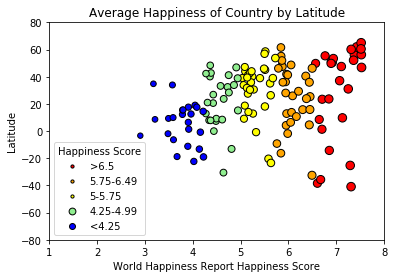

In [77]:
plt.scatter(happiest_df["Average Happiness Score 2015-2017"], happiest_df["Latitude"],
            facecolors="red", edgecolors="black", s = happiest_df["Average Happiness Score 2015-2017"]*10)
plt.scatter(happier_df["Average Happiness Score 2015-2017"], happier_df["Latitude"],
            facecolors="orange", edgecolors="black", s = happier_df["Average Happiness Score 2015-2017"]*10)
plt.scatter(meh_df["Average Happiness Score 2015-2017"], meh_df["Latitude"],
            facecolors="yellow", edgecolors="black", s = meh_df["Average Happiness Score 2015-2017"]*10)
plt.scatter(sad_df["Average Happiness Score 2015-2017"], sad_df["Latitude"],
            facecolors="lightgreen", edgecolors="black", s = sad_df["Average Happiness Score 2015-2017"]*10)
plt.scatter(saddest_df["Average Happiness Score 2015-2017"], saddest_df["Latitude"],
            facecolors="blue", edgecolors="black", s = saddest_df["Average Happiness Score 2015-2017"]*10)

plt.grid()

# Set your x and y limits
plt.xlim(1,8)
plt.ylim(-80,80)

# Incorporate the other graph properties
plt.title("Average Happiness of Country by Latitude")
plt.xlabel("World Happiness Report Happiness Score")
plt.ylabel("Latitude")
plt.grid()

# Create a legend
legend = plt.legend (('>6.5', '5.75-6.49', '5-5.75', '4.25-4.99', '<4.25'),
                     title = "Happiness Score",
                     scatterpoints = 1,
                     loc = 'lower left')

legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [10]
legend.legendHandles[2]._sizes = [10]

plt.savefig("Images/avg_happiness_by_lat.png")
